# AegisLens: Explainable Phishing Detector
model_showdown.ipynb - Final Model Selection

The goal of this Notebook is to create a fair head-to-head competition between the wining models of each training notebook in order to see which model has best identification capabilities.

---

## 1. Project Setup and Library Imports

In [1]:
import pandas as pd
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


## 2. Load Champion Models
Load the three champion models saved from our previous analyses.
We assume the notebook is run from the project's root directory.

In [3]:
try:
    model1 = joblib.load('models/url_model_ds1.joblib')
    model2 = joblib.load('models/url_model_ds2.joblib')
    model3 = joblib.load('models/url_model_ds3.joblib')
    print("Three champion models loaded successfully.")
    print(f"Model 1 (from Dataset 1): {type(model1).__name__}")
    print(f"Model 2 (from Dataset 2): {type(model2).__name__}")
    print(f"Model 3 (from Dataset 3): {type(model3).__name__}")
except FileNotFoundError as e:
    print(f"Error loading models: {e}")
    print("Please ensure you have run the training notebooks and the .joblib files exist in the 'models' directory.")

Three champion models loaded successfully.
Model 1 (from Dataset 1): RandomForestClassifier
Model 2 (from Dataset 2): RandomForestClassifier
Model 3 (from Dataset 3): RandomForestClassifier


## 3. Prepare Test Data
To ensure a fair and reproducible test, we will reload each dataset and apply the exact same train_test_split implemented on each dataset in their respective notebooks to get our test sets.

In [4]:
# --- Prepare Test Set 1 ---
df1 = pd.read_csv('data/phishing_dataset_ml_full.csv')
if 'id' in df1.columns: df1 = df1.drop('id', axis=1)
X1 = df1.drop('CLASS_LABEL', axis=1)
y1 = df1['CLASS_LABEL']
_, X_test1, _, y_test1 = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=42)
print("\nTest Set 1 prepared.")

# --- Prepare Test Set 2 ---
df2 = pd.read_csv('data/dataset_cybersecurity_michelle.csv')
X2 = df2.drop('phishing', axis=1)
y2 = df2['phishing']
_, X_test2, _, y_test2 = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=42)
print("Test Set 2 prepared.")

# --- Prepare Test Set 3 ---
df3 = pd.read_csv('data/web-page-phishing.csv')
X3 = df3.drop('phishing', axis=1)
y3 = df3['phishing']
_, X_test3, _, y_test3 = train_test_split(X3, y3, test_size=0.2, stratify=y3, random_state=42)
print("Test Set 3 prepared.")


Test Set 1 prepared.
Test Set 2 prepared.
Test Set 3 prepared.


## 4. The Showdown: Evaluate All Models
Evaluate each champion on its respective test set.

In [5]:
showdown_results = {}

# --- Evaluate Model 1 ---
y_pred1 = model1.predict(X_test1)
showdown_results['Champion 1 (Dataset 1)'] = [
    accuracy_score(y_test1, y_pred1),
    precision_score(y_test1, y_pred1),
    recall_score(y_test1, y_pred1),
    f1_score(y_test1, y_pred1)
]
print("\nModel 1 evaluation complete.")

# --- Evaluate Model 2 ---
y_pred2 = model2.predict(X_test2)
showdown_results['Champion 2 (Dataset 2)'] = [
    accuracy_score(y_test2, y_pred2),
    precision_score(y_test2, y_pred2),
    recall_score(y_test2, y_pred2),
    f1_score(y_test2, y_pred2)
]
print("Model 2 evaluation complete.")

# --- Evaluate Model 3 ---
y_pred3 = model3.predict(X_test3)
showdown_results['Champion 3 (Dataset 3)'] = [
    accuracy_score(y_test3, y_pred3),
    precision_score(y_test3, y_pred3),
    recall_score(y_test3, y_pred3),
    f1_score(y_test3, y_pred3)
]
print("Model 3 evaluation complete.")


Model 1 evaluation complete.
Model 2 evaluation complete.
Model 3 evaluation complete.


## 5. Compare Results and Declare the Ultimate Champion


--- Model Showdown Results ---


,Accuracy,Precision,Recall,F1-Score
Champion 1 (Dataset 1),0.985500,0.985986,0.985000,0.985493
Champion 2 (Dataset 2),0.989167,0.986111,0.986962,0.986536
Champion 3 (Dataset 3),0.889888,0.860783,0.831431,0.845853


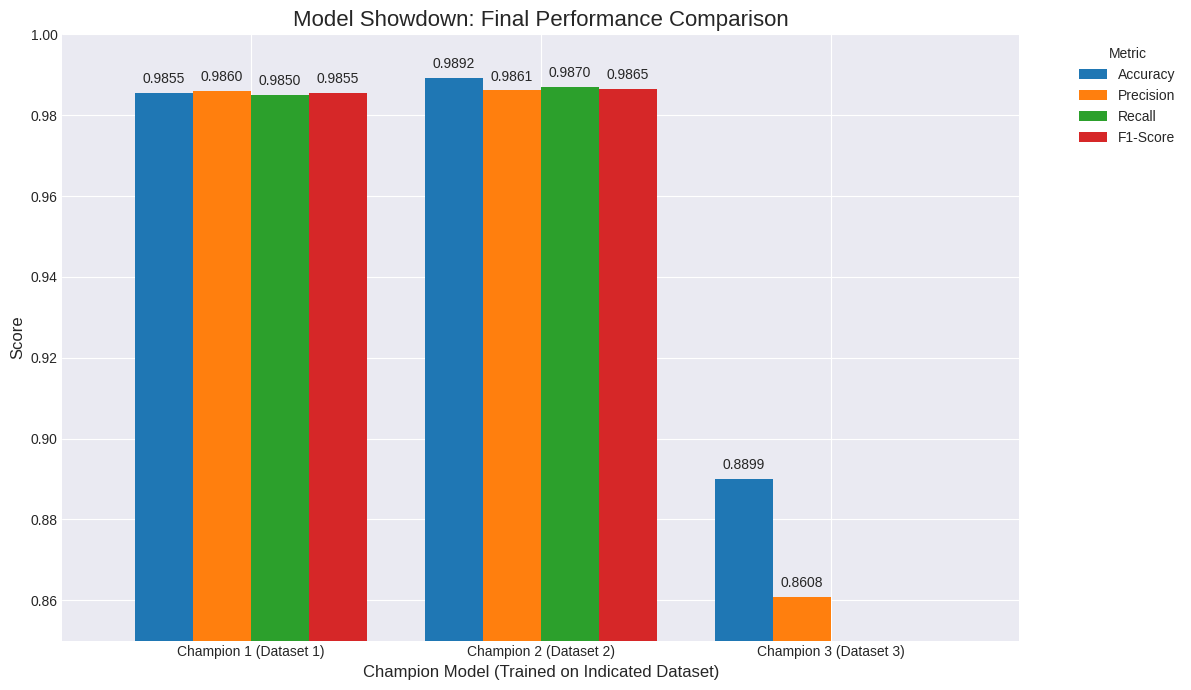

In [16]:
print("\n--- Model Showdown Results ---")
showdown_df = pd.DataFrame.from_dict(
    showdown_results,
    orient='index',
    columns=['Accuracy', 'Precision', 'Recall', 'F1-Score']
)
display(showdown_df)

# --- Visualize Showdown Performance ---
plt.style.use('seaborn-v0_8-darkgrid')
ax = showdown_df.plot(kind='bar', figsize=(12, 7), rot=0, width=0.8)
plt.title('Model Showdown: Final Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Champion Model (Trained on Indicated Dataset)', fontsize=12)
plt.ylim(0.85, 1.0)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()